In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
df=pd.read_csv("D:\DSAI Learning\project 1\AI-Data.csv")
df.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [6]:
print(df.shape)

(480, 17)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [8]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [9]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

Percentage M    0.635417
F    0.364583
Name: gender, dtype: float64


<Axes: >

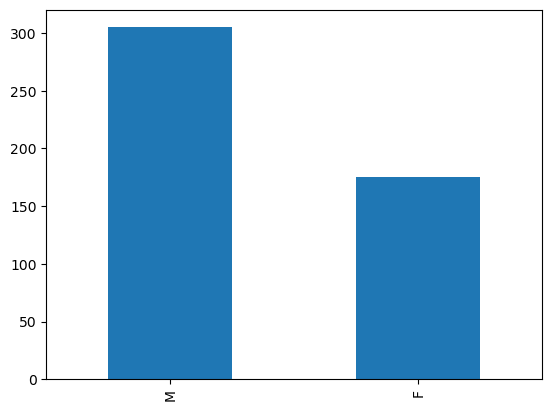

In [10]:
print('Percentage',df.gender.value_counts(normalize=True))
df.gender.value_counts(normalize=False).plot(kind='bar')

In [11]:
df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

Percentage KW             0.372917
Jordan         0.358333
Palestine      0.058333
Iraq           0.045833
lebanon        0.035417
Tunis          0.025000
SaudiArabia    0.022917
Egypt          0.018750
Syria          0.014583
USA            0.012500
Iran           0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: NationalITy, dtype: float64


<Axes: >

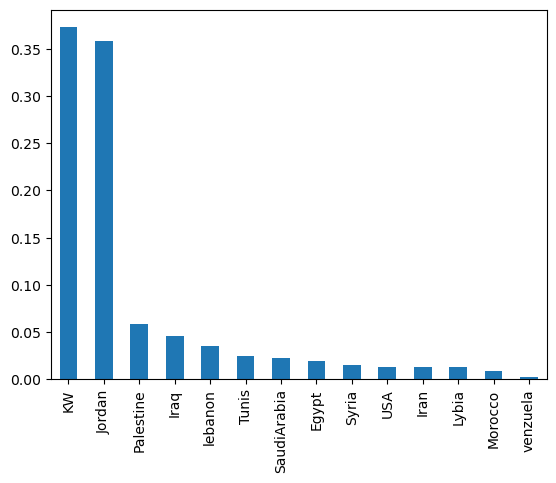

In [12]:
print('Percentage',df.NationalITy.value_counts(normalize=True))
df.NationalITy.value_counts(normalize=True).plot(kind='bar')

In [13]:
df['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

Percentage KuwaIT         0.375000
Jordan         0.366667
Iraq           0.045833
lebanon        0.039583
SaudiArabia    0.033333
USA            0.033333
Palestine      0.020833
Egypt          0.018750
Tunis          0.018750
Iran           0.012500
Syria          0.012500
Lybia          0.012500
Morocco        0.008333
venzuela       0.002083
Name: PlaceofBirth, dtype: float64


<Axes: >

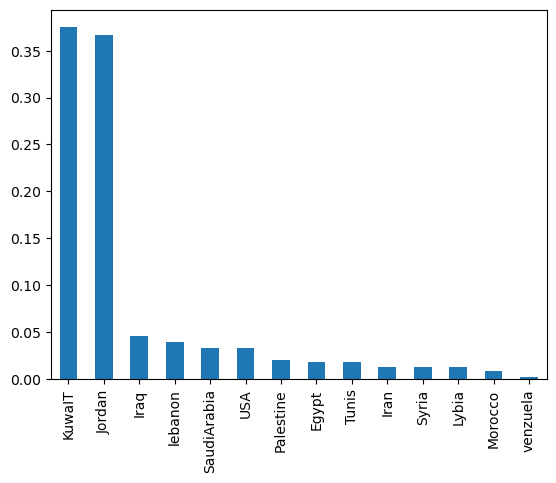

In [14]:
print('Percentage',df.PlaceofBirth.value_counts(normalize=True))
df.PlaceofBirth.value_counts(normalize=True).plot(kind='bar')

In [15]:
df['PlaceofBirth'].value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

Percentage IT           0.197917
French       0.135417
Arabic       0.122917
Science      0.106250
English      0.093750
Biology      0.062500
Spanish      0.052083
Chemistry    0.050000
Geology      0.050000
Quran        0.045833
Math         0.043750
History      0.039583
Name: Topic, dtype: float64


<Axes: >

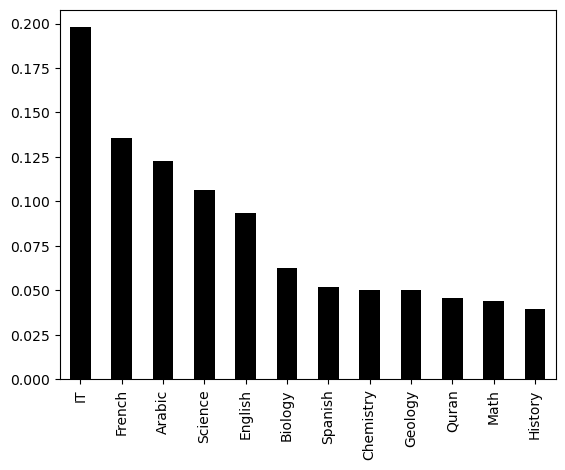

In [16]:
print('Percentage',df.Topic.value_counts(normalize=True))
df.Topic.value_counts(normalize=True).plot(kind='bar',color='black')

In [17]:
df['Topic'].value_counts()

IT           95
French       65
Arabic       59
Science      51
English      45
Biology      30
Spanish      25
Chemistry    24
Geology      24
Quran        22
Math         21
History      19
Name: Topic, dtype: int64

In [18]:
df['StageID'].value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

Percentage MiddleSchool    0.516667
lowerlevel      0.414583
HighSchool      0.068750
Name: StageID, dtype: float64


<Axes: >

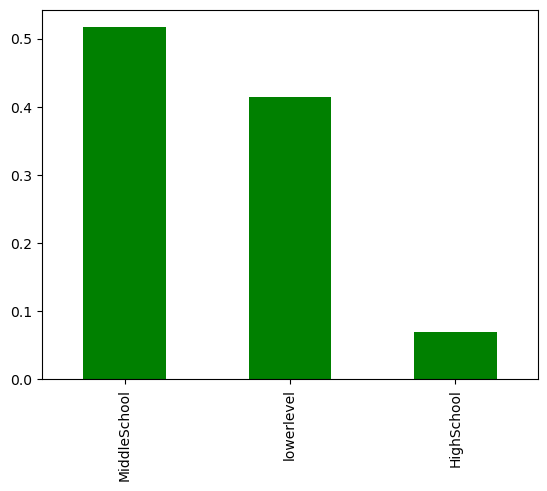

In [19]:
print('Percentage',df.StageID.value_counts(normalize=True))
df.StageID.value_counts(normalize=True).plot(kind="bar",color="Green")

In [20]:
df['Semester'].value_counts()

F    245
S    235
Name: Semester, dtype: int64

Percentage F    0.510417
S    0.489583
Name: Semester, dtype: float64


<Axes: >

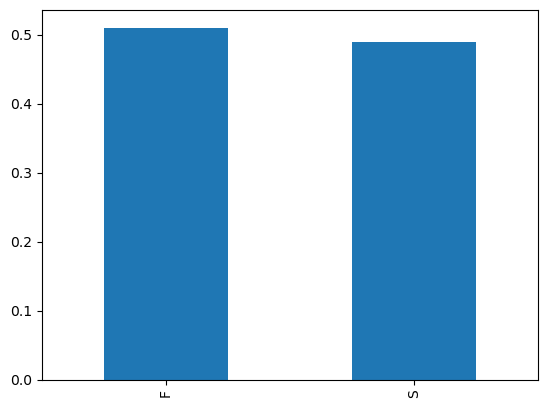

In [21]:
print('Percentage',df.Semester.value_counts(normalize=True))
df.Semester.value_counts(normalize=True).plot(kind="bar")

In [22]:
df['GradeID'].value_counts()

G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64

percentage G-02    0.306250
G-08    0.241667
G-07    0.210417
G-04    0.100000
G-06    0.066667
G-11    0.027083
G-12    0.022917
G-09    0.010417
G-10    0.008333
G-05    0.006250
Name: GradeID, dtype: float64


<Axes: >

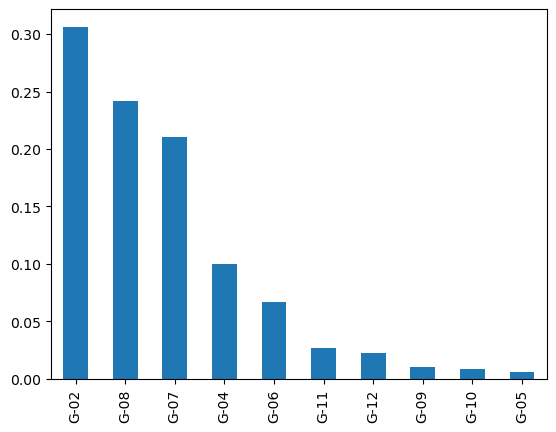

In [23]:
print("percentage",df.GradeID.value_counts(normalize=True))
df.GradeID.value_counts(normalize=True).plot(kind='bar')

Percentage 10    0.064583
70    0.064583
80    0.058333
72    0.035417
50    0.035417
        ...   
61    0.002083
83    0.002083
52    0.002083
67    0.002083
97    0.002083
Name: raisedhands, Length: 82, dtype: float64


<Axes: ylabel='raisedhands'>

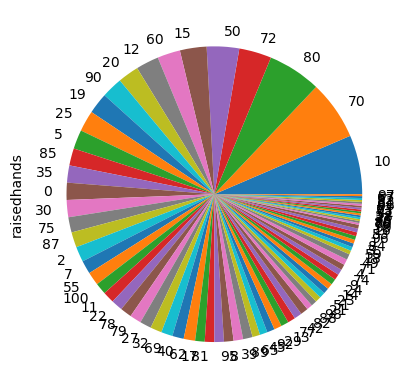

In [24]:
print('Percentage',df.raisedhands.value_counts(normalize=True))
df.raisedhands.value_counts(normalize=True).plot(kind='pie',legend=[])

In [25]:
df['ParentAnsweringSurvey'].value_counts()

Yes    270
No     210
Name: ParentAnsweringSurvey, dtype: int64

Percentage Yes    0.5625
No     0.4375
Name: ParentAnsweringSurvey, dtype: float64


<Axes: >

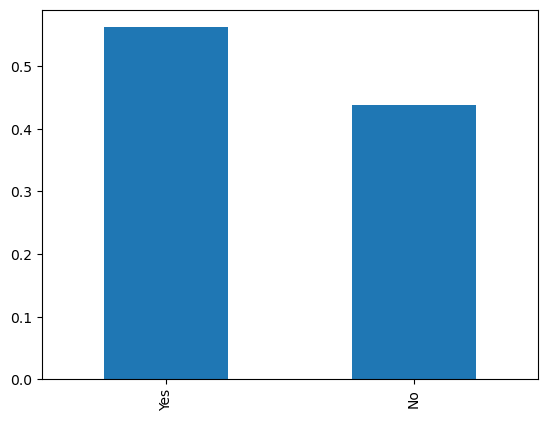

In [26]:
print('Percentage',df.ParentAnsweringSurvey.value_counts(normalize=True))
df.ParentAnsweringSurvey.value_counts(normalize=True).plot(kind='bar')

In [27]:
df['raisedhands'].value_counts()

10    31
70    31
80    28
72    17
50    17
      ..
61     1
83     1
52     1
67     1
97     1
Name: raisedhands, Length: 82, dtype: int64

In [28]:
df['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

Percentage M    0.439583
H    0.295833
L    0.264583
Name: Class, dtype: float64


<Axes: >

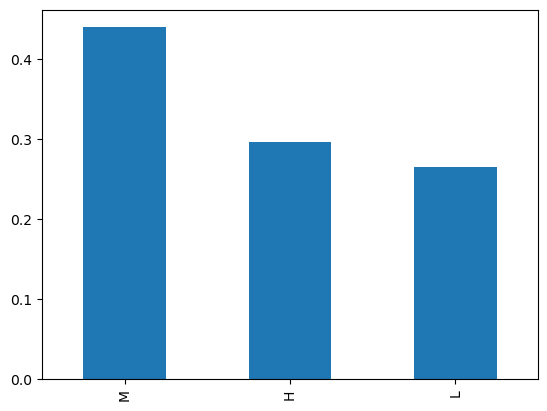

In [29]:
print('Percentage',df.Class.value_counts(normalize=True))
df.Class.value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='SectionID', ylabel='count'>

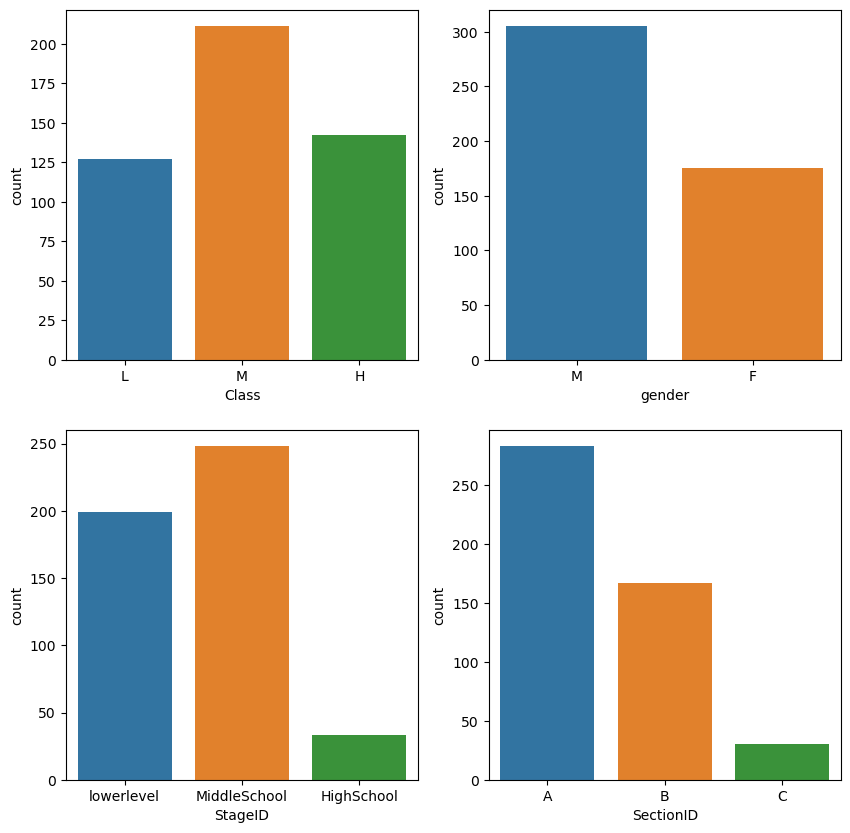

In [30]:
fig,axarr=plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class',data=df,ax=axarr[0,0],order=['L','M','H'])
sns.countplot(x='gender',data=df,ax=axarr[0,1],order=['M','F'])
sns.countplot(x='StageID',data=df,ax=axarr[1,0])
sns.countplot(x='SectionID',data=df,ax=axarr[1,1])


<Axes: xlabel='NationalITy', ylabel='count'>

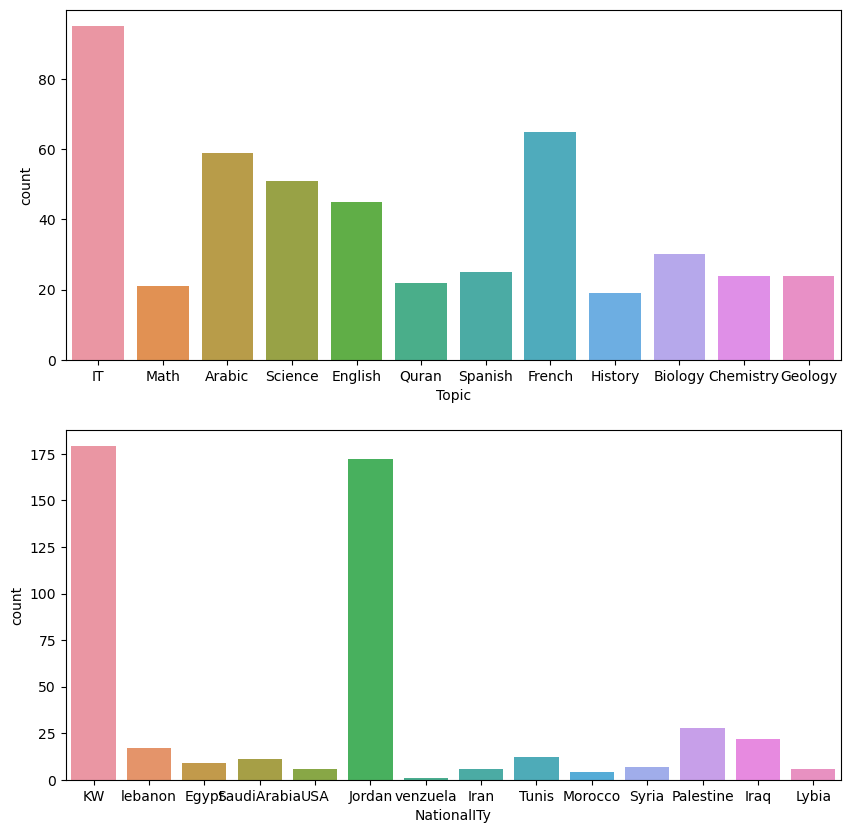

In [31]:
fig,(axis1,axis2)=plt.subplots(2,1,figsize=(10,10))
sns.countplot(x='Topic',data=df,ax=axis1)
sns.countplot(x='NationalITy',data=df,ax=axis2)

<Axes: xlabel='Class', ylabel='VisITedResources'>

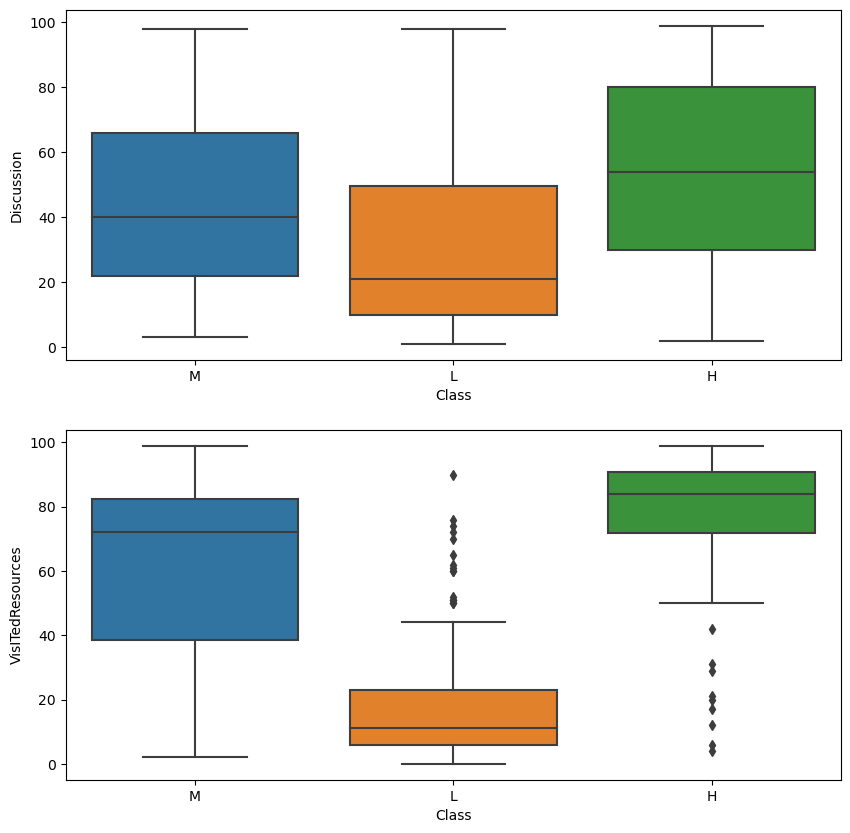

In [32]:
fig,(axis1,axis2)=plt.subplots(2,1,figsize=(10,10))
sns.boxplot(x='Class',y='Discussion',data=df,order=['M','L','H'],ax=axis1)
sns.boxplot(x='Class',y='VisITedResources',data=df,order=['M','L','H'],ax=axis2)

<Axes: xlabel='AnnouncementsView', ylabel='Discussion'>

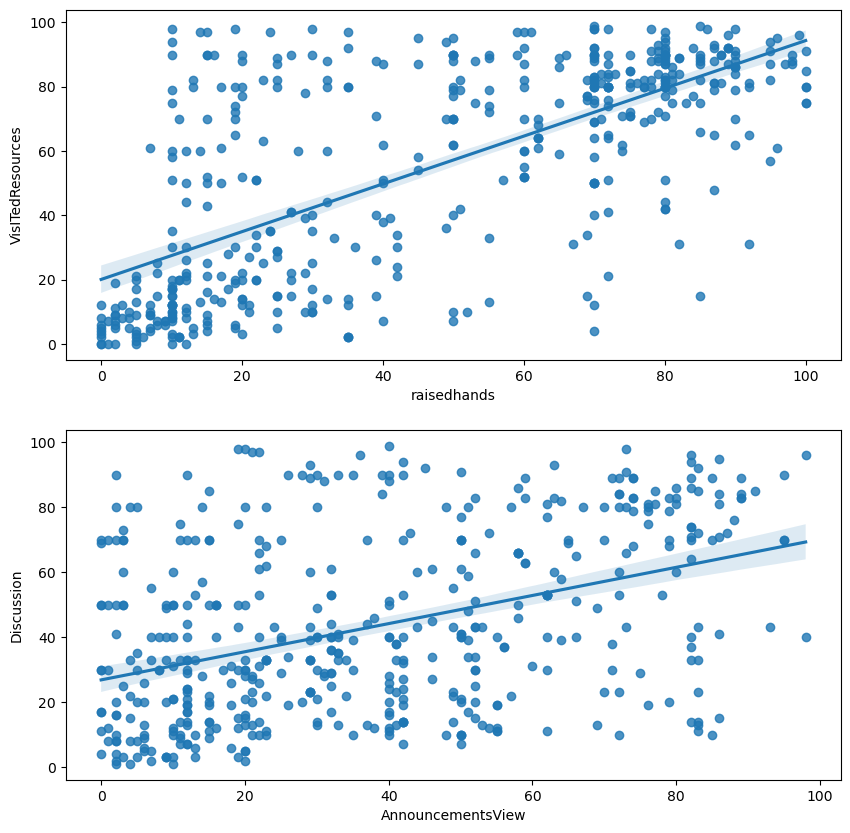

In [33]:
fig,(axis1,axis2)=plt.subplots(2,1,figsize=(10,10))
sns.regplot(x='raisedhands',y='VisITedResources',data=df,ax=axis1)
sns.regplot(x='AnnouncementsView',y='Discussion',data=df,ax=axis2)

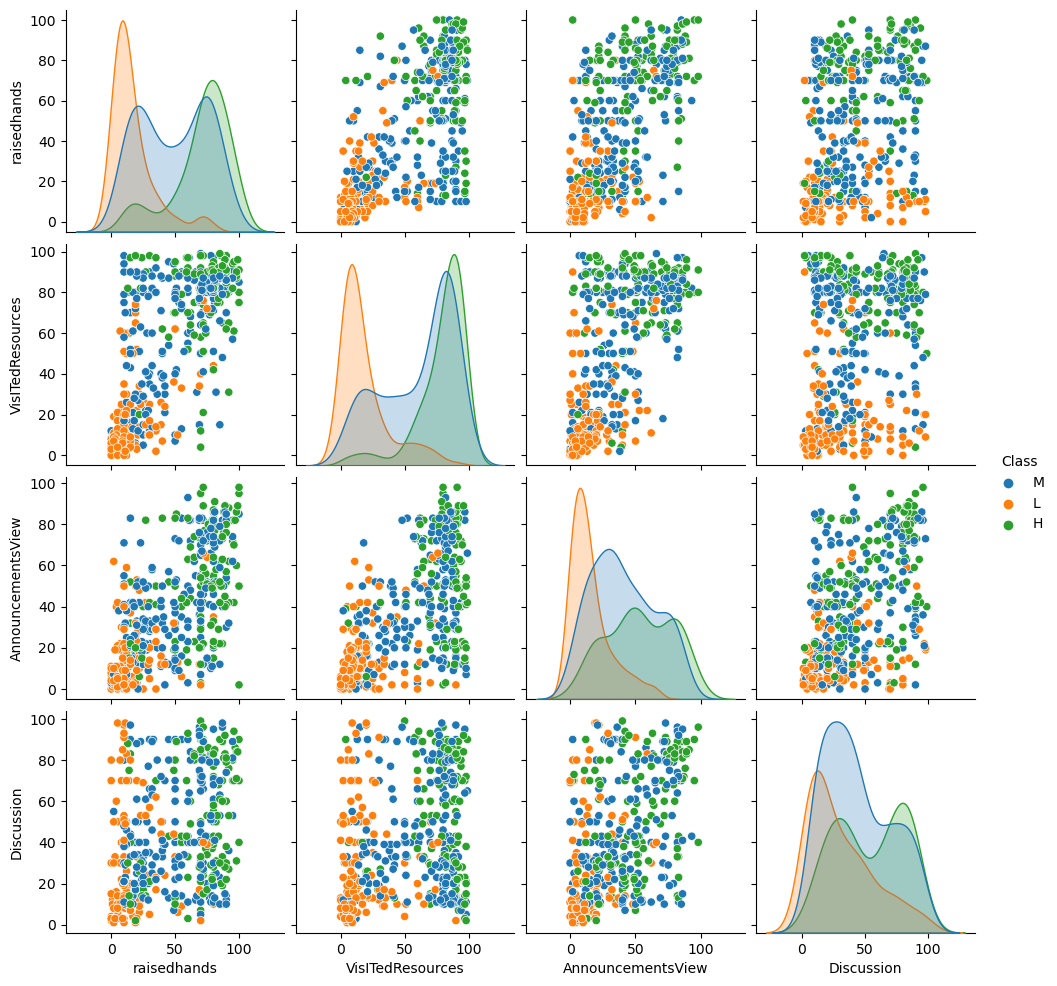

In [34]:
sns.pairplot(df,hue='Class')

In [35]:
import networkx as nx

Graph with 0 nodes and 0 edges
Graph with 16 nodes and 26 edges


C:\Users\MAli\AppData\Local\Temp\ipykernel_13260\2888557405.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(g))


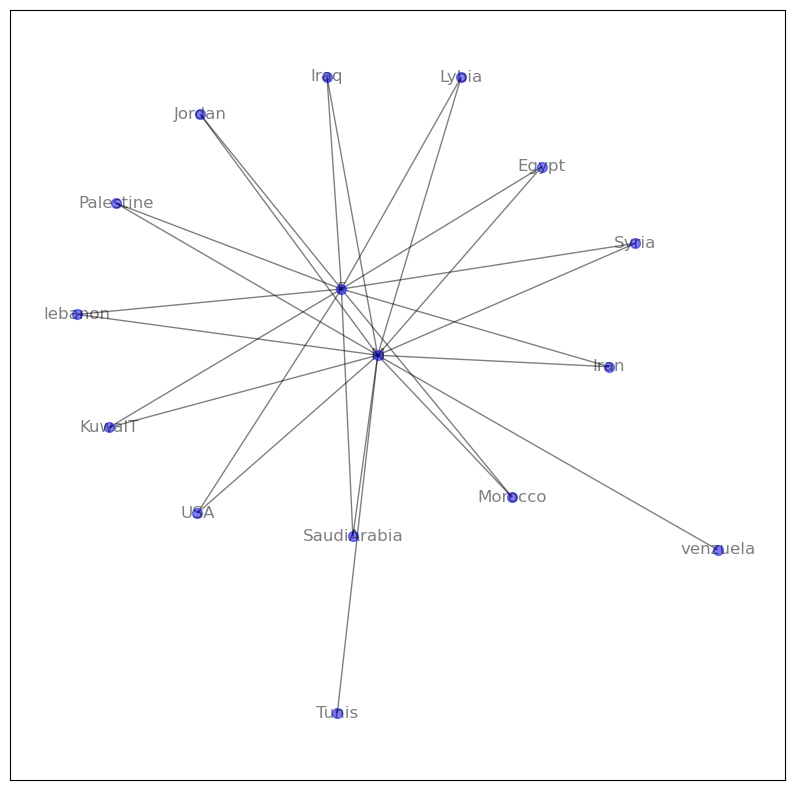

In [36]:
g=nx.Graph()
print(g)
g=nx.from_pandas_edgelist(df,source='gender',target='PlaceofBirth',edge_attr=None,create_using=None, edge_key=None)

print(nx.info(g))

plt.figure(figsize=(10,10))
nx.draw_networkx(g,with_labels=True,node_size=50,alpha=0.5,node_color='blue')
plt.show()

Label Encoding 

In [37]:
Features=df.drop('gender',axis=1)
Target=df['Class']
label=LabelEncoder()
data=np.zeros((480,16),float)
cat_columns=Features.dtypes.pipe(lambda Features: Features[Features=='float']).index
# for col in cat_columns:
i=0
for col in Features:
    c=Features[col]    
    f=label.fit_transform(c.values)
    data[:,i]=f
    i=i+1
    
    

    #     Features[col]=label.fit(Features[col])

In [38]:
print(data[:,15])

[2. 2. 1. 1. 2. 2. 1. 2. 2. 2. 0. 2. 1. 1. 0. 2. 2. 2. 2. 0. 2. 2. 2. 1.
 1. 1. 2. 1. 2. 2. 0. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2. 1. 2. 2. 1. 1. 0.
 0. 2. 1. 1. 2. 0. 1. 1. 1. 1. 2. 2. 1. 2. 0. 2. 1. 1. 2. 0. 0. 2. 1. 2.
 1. 2. 1. 2. 2. 2. 1. 0. 1. 1. 1. 2. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 2. 2. 2. 2. 0. 1. 1. 2. 1. 2. 0. 2. 2. 0. 2. 1. 1. 1. 1. 2. 0. 2. 2.
 2. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 0. 0. 0. 2. 0. 2. 1. 1. 2. 0.
 1. 2. 0. 2. 2. 0. 0. 2. 0. 1. 2. 0. 2. 2. 1. 2. 0. 2. 0. 2. 2. 0. 2. 0.
 0. 2. 0. 2. 1. 1. 2. 1. 0. 2. 0. 2. 0. 1. 0. 2. 1. 0. 2. 2. 0. 2. 1. 1.
 2. 2. 2. 2. 0. 0. 1. 2. 0. 0. 2. 2. 1. 0. 2. 2. 2. 2. 0. 2. 0. 1. 1. 1.
 2. 2. 0. 2. 2. 2. 2. 0. 0. 2. 1. 1. 0. 1. 2. 1. 2. 2. 2. 1. 1. 2. 2. 0.
 0. 2. 1. 2. 0. 2. 0. 2. 1. 2. 0. 1. 2. 1. 0. 0. 0. 2. 2. 1. 1. 2. 2. 2.
 2. 0. 2. 2. 2. 2. 0. 2. 2. 0. 0. 0. 0. 0. 2. 2. 0. 0. 0. 0. 2. 2. 0. 0.
 2. 2. 1. 1. 0. 0. 2. 2. 0. 0. 2. 2. 1. 1. 2. 2. 2. 2. 0. 0. 2. 2. 2. 2.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 1. 1. 2. 2. 1. 1. 2.

In [39]:
cat_columns

Index([], dtype='object')

Feature/Attribute 

In [40]:
Features

,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


Target 

In [41]:
y=data[:,-1]

In [42]:
y.reshape(-1,1)

array([[2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],

Data Training and Testing/ Split 

In [43]:
x_train,x_test,y_train,y_test=train_test_split(data,y,train_size=0.8,random_state=42)

In [44]:
# x_test = np.array([x_test]).reshape(-1,1)
# x_train = np.array([x_train]).reshape(-1,1)
# y_test = np.array([y_test]).reshape(-1,1)
# y_train = np.array([y_train]).reshape(-1,1)

In [45]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
# x_train=np.array([x_train])
# np.squeeze(x_train,0)
# x_train=x_train.T

# print(x_train.shape)

# y_train= np.array([y_train]).squeeze(0)


(384, 16) (384,) (96, 16) (96,)


Logistic Regression 

In [46]:
logit_model=LogisticRegression(C=0.01,max_iter=400,
                   multi_class='multinomial',n_jobs=1,penalty='l1',random_state=None, solver='saga',tol=0.0008,
                  verbose=0,warm_start=False)

In [47]:
logit_model.fit(x_train,y_train)

LogisticRegression(C=0.01, max_iter=400, multi_class='multinomial', n_jobs=1,
                   penalty='l1', solver='saga', tol=0.0008)

Testting Results/Reports

In [48]:
Prediction=logit_model.predict(x_test)
score=accuracy_score(y_test,Prediction)
Report=classification_report(y_test,Prediction)

In [49]:
Prediction

array([2., 1., 0., 0., 0., 2., 2., 2., 2., 2., 2., 0., 2., 1., 0., 0., 1.,
       2., 1., 2., 0., 0., 2., 2., 1., 1., 0., 2., 2., 1., 2., 1., 1., 0.,
       2., 0., 1., 2., 2., 2., 2., 0., 1., 2., 2., 2., 0., 2., 0., 2., 2.,
       2., 1., 2., 2., 2., 1., 0., 2., 1., 2., 2., 1., 2., 2., 2., 1., 0.,
       1., 0., 2., 0., 2., 2., 2., 1., 2., 1., 1., 2., 0., 2., 2., 0., 0.,
       2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 0.])

In [50]:
score

0.8645833333333334

In [120]:
print(Report,'\n')

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       120
         1.0       0.88      0.90      0.89       101
         2.0       0.95      0.94      0.95       163

    accuracy                           0.94       384
   macro avg       0.94      0.94      0.94       384
weighted avg       0.94      0.94      0.94       384
 



Training Accuracy/Report

In [51]:
logit_model=LogisticRegression()
logit_model.fit(x_test,y_test)
Prediction=logit_model.predict(x_train)
score=accuracy_score(y_train,Prediction)
Report=classification_report(y_train,Prediction)
score


C:\Users\MAli\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9401041666666666

In [52]:
print(Report,'\n')

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       120
         1.0       0.88      0.90      0.89       101
         2.0       0.95      0.94      0.95       163

    accuracy                           0.94       384
   macro avg       0.94      0.94      0.94       384
weighted avg       0.94      0.94      0.94       384
 



XGBOOST Testing

In [122]:
xgb=XGBClassifier(max_depth=2,learning_rate=0.1,n_estimators=10,seed=10)
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
score=accuracy_score(y_test,xgb_pred)
Report=classification_report(y_test,xgb_pred)
score



1.0

In [123]:
print(Report,'\n')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      1.00      1.00        26
         2.0       1.00      1.00      1.00        48

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96
 



XGBOOST Traing Report

In [124]:
xgb=XGBClassifier(max_depth=2,learning_rate=0.1,n_estimators=10,seed=10)
xgb.fit(x_test,y_test)
xgb_pred = xgb.predict(x_train)
score=accuracy_score(y_train,xgb_pred)
Report=classification_report(y_train,xgb_pred)
score


1.0

In [125]:
print(Report,'\n')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       120
         1.0       1.00      1.00      1.00       101
         2.0       1.00      1.00      1.00       163

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384
 



In [55]:
#xgb_predi=xgb.predict(y_train)
#print(classification_report(y_train,xgb_predi))

Decision Tree

In [56]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

Testing Accuracy Report

In [57]:
pre=model.predict(x_test)
score3=accuracy_score(y_test,pre)
report3=classification_report(y_test,pre)

In [58]:
pre

array([2., 1., 0., 0., 0., 1., 2., 1., 2., 2., 2., 0., 2., 2., 0., 0., 1.,
       2., 1., 2., 0., 0., 1., 2., 2., 1., 0., 2., 1., 2., 2., 2., 1., 0.,
       2., 0., 2., 1., 2., 2., 2., 0., 1., 2., 2., 1., 0., 2., 0., 2., 2.,
       2., 1., 2., 2., 2., 1., 0., 2., 1., 2., 1., 1., 2., 2., 2., 1., 0.,
       1., 0., 2., 0., 2., 2., 2., 1., 2., 1., 1., 2., 0., 2., 1., 0., 0.,
       2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 0.])

In [59]:
score3

1.0

In [60]:
print(report3,'\n')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      1.00      1.00        26
         2.0       1.00      1.00      1.00        48

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96
 



Training Accuracy report

In [61]:
model.fit(x_test,y_test)
pre=model.predict(x_train)
score3=accuracy_score(y_train,pre)
report3=classification_report(y_train,pre)

In [62]:
score3

1.0

In [63]:
print(report3,'\n')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       120
         1.0       1.00      1.00      1.00       101
         2.0       1.00      1.00      1.00       163

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384
 



Random Forest Classifier 

In [110]:
RF=RandomForestClassifier()

In [112]:
RF.fit(x_train,y_train)

RandomForestClassifier()

Testing Accuracy Report

In [113]:
pred4=RF.predict(x_test)
score4=accuracy_score(y_test,pred4)
report4=classification_report(y_test,pred4)

In [107]:
pred4

array([2., 1., 0., 0., 0., 1., 2., 1., 2., 2., 2., 0., 2., 2., 0., 0., 1.,
       2., 1., 2., 0., 0., 1., 2., 2., 1., 0., 2., 1., 2., 2., 2., 1., 0.,
       2., 0., 2., 1., 2., 2., 2., 0., 1., 2., 2., 1., 0., 2., 0., 2., 2.,
       2., 1., 2., 2., 2., 1., 0., 2., 1., 2., 1., 1., 2., 2., 2., 1., 0.,
       1., 0., 2., 0., 2., 2., 2., 1., 2., 1., 1., 2., 0., 2., 1., 0., 0.,
       2., 2., 1., 1., 2., 2., 2., 2., 2., 1., 0.])

In [114]:
score4

1.0

In [128]:
print(report4,'\n')

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      1.00      1.00        26
         2.0       1.00      1.00      1.00        48

    accuracy                           1.00        96
   macro avg       1.00      1.00      1.00        96
weighted avg       1.00      1.00      1.00        96
 



Training Accuracy Report

In [129]:
g=RF.fit(x_test,y_test)
pred=g.predict(x_train)
score=accuracy_score(y_train,pred)
Report=classification_report(y_train,pred)
score

0.984375

In [132]:
print(Report,'\n')

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       120
         1.0       0.97      0.97      0.97       101
         2.0       1.00      1.00      1.00       163

    accuracy                           0.98       384
   macro avg       0.98      0.98      0.98       384
weighted avg       0.98      0.98      0.98       384
 

